In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('Student_performance_data _.csv')

In [5]:
print("Feature Statistics:")
print(df.describe())

Feature Statistics:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971    

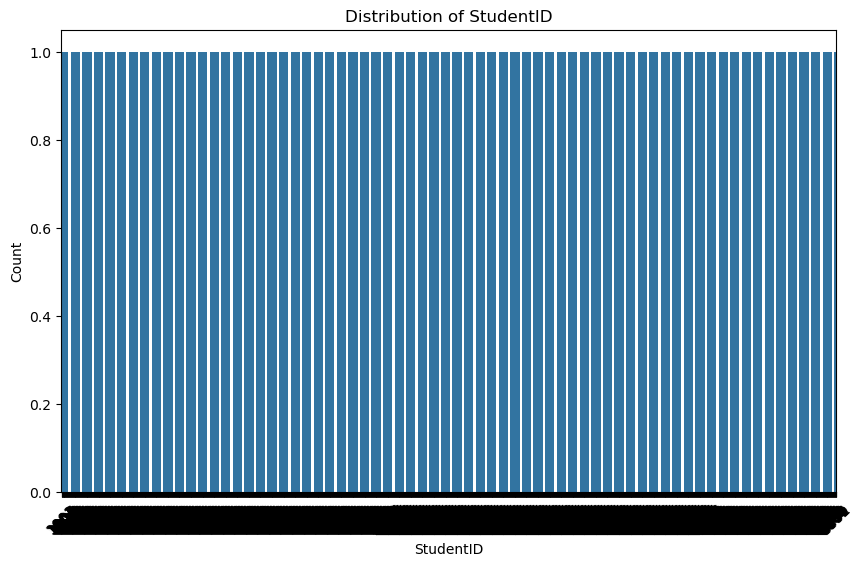

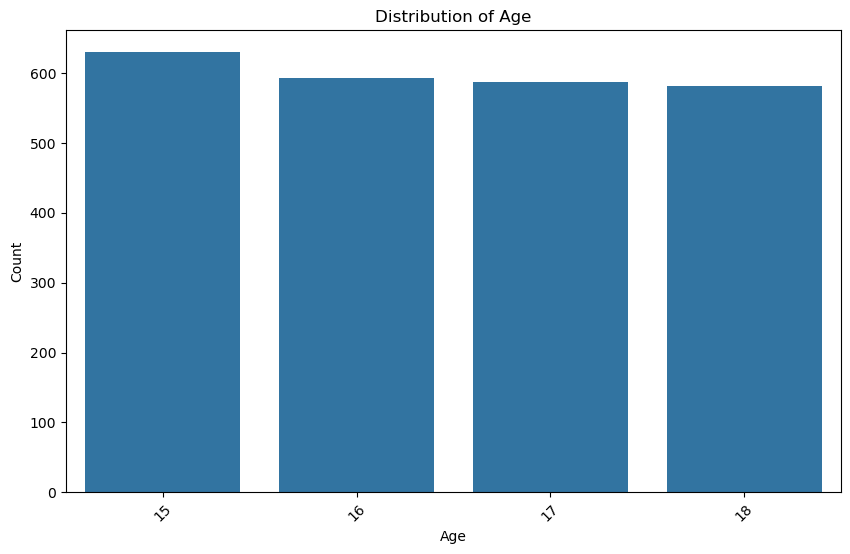

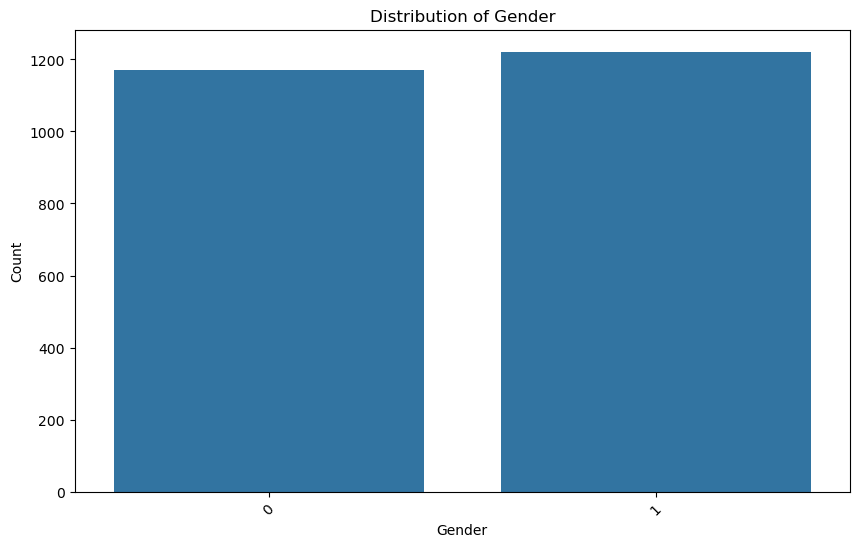

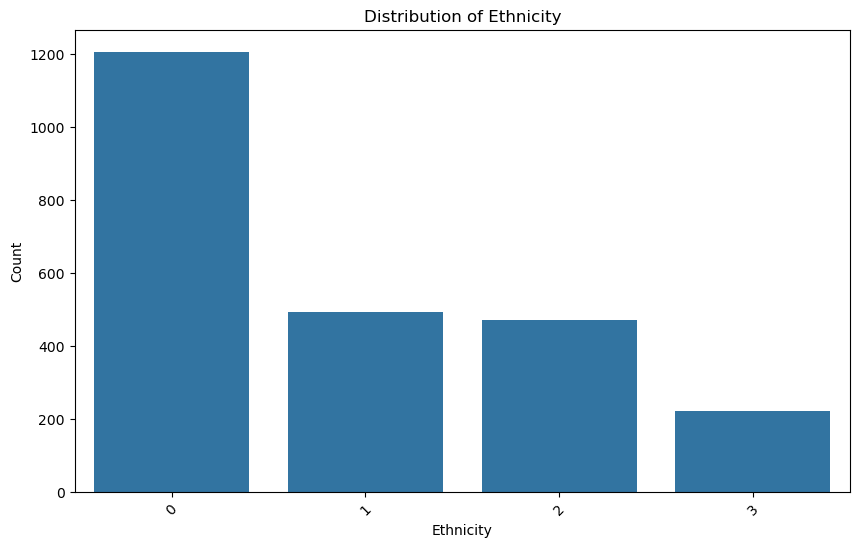

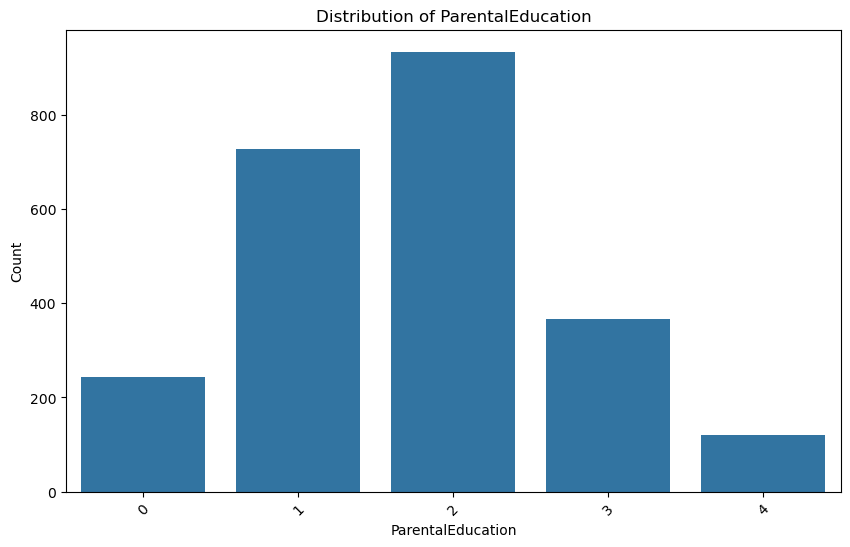

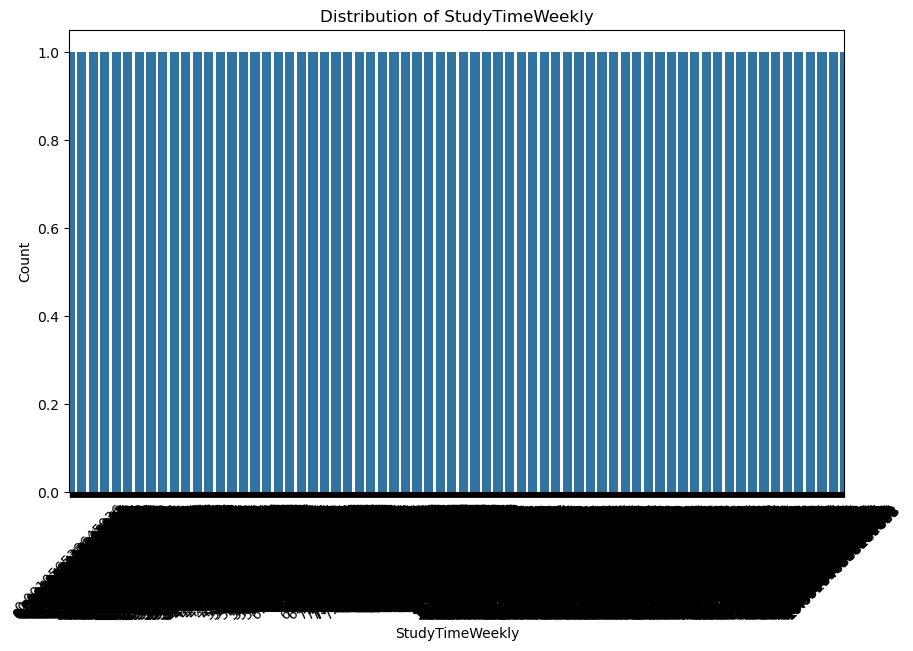

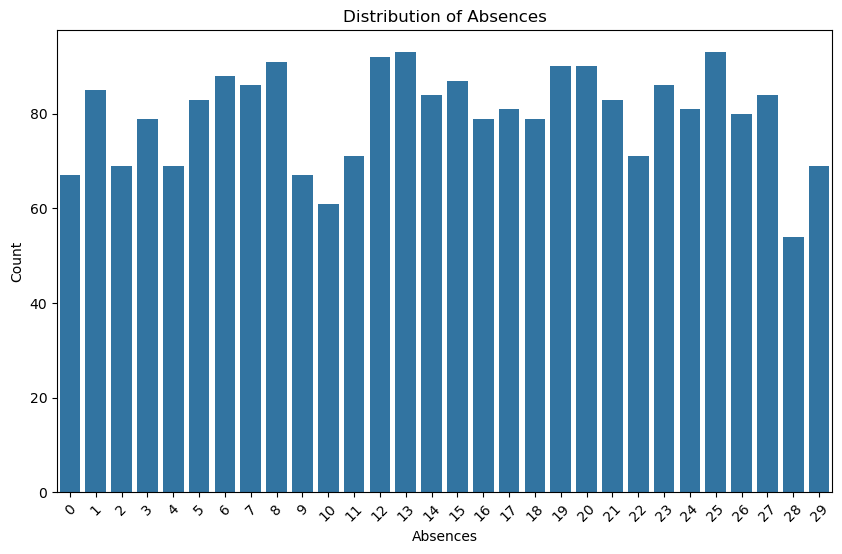

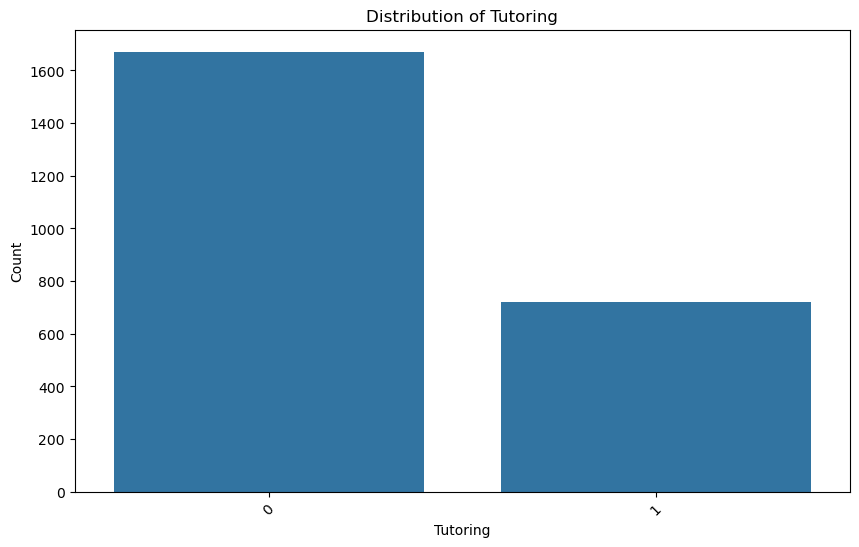

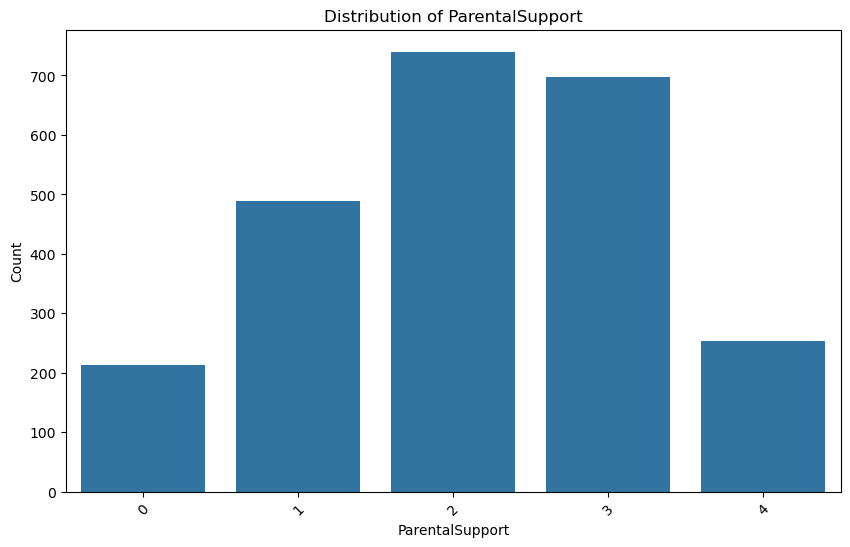

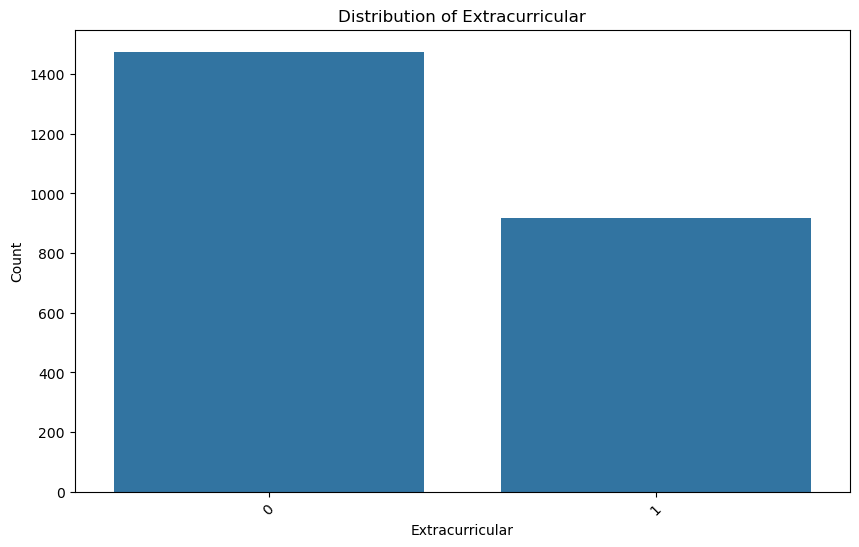

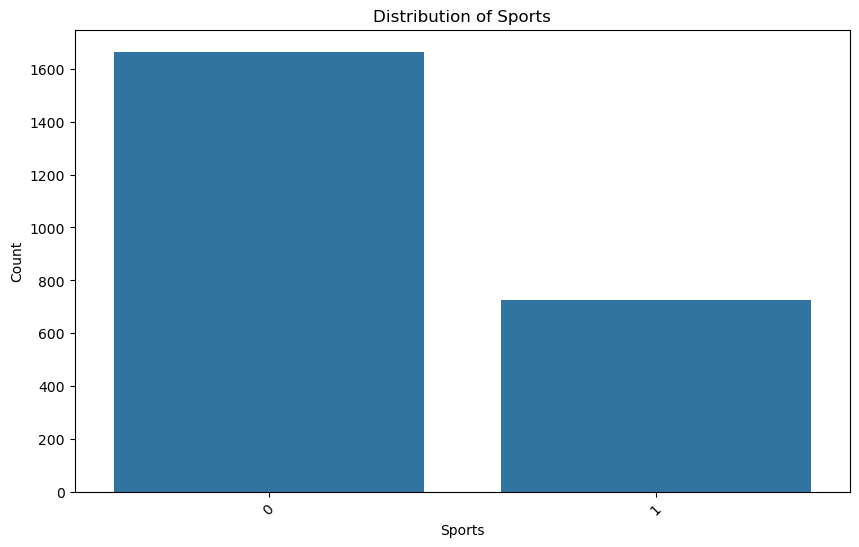

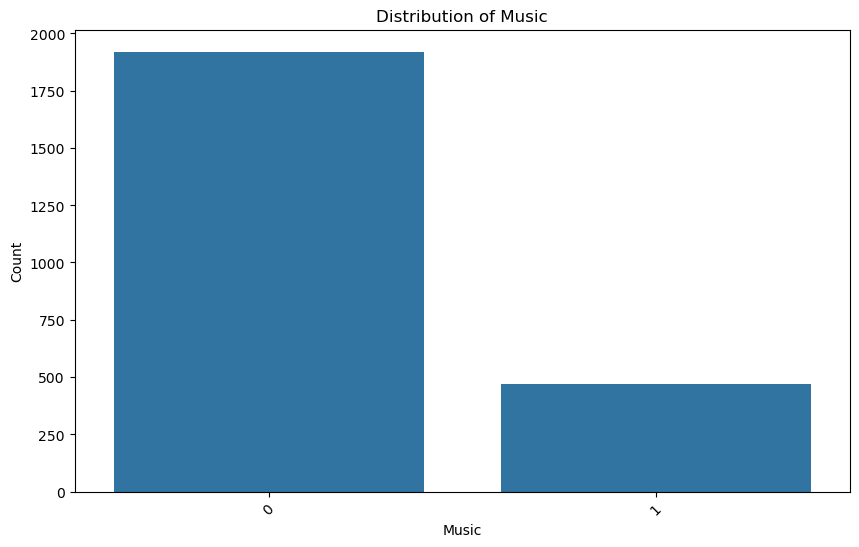

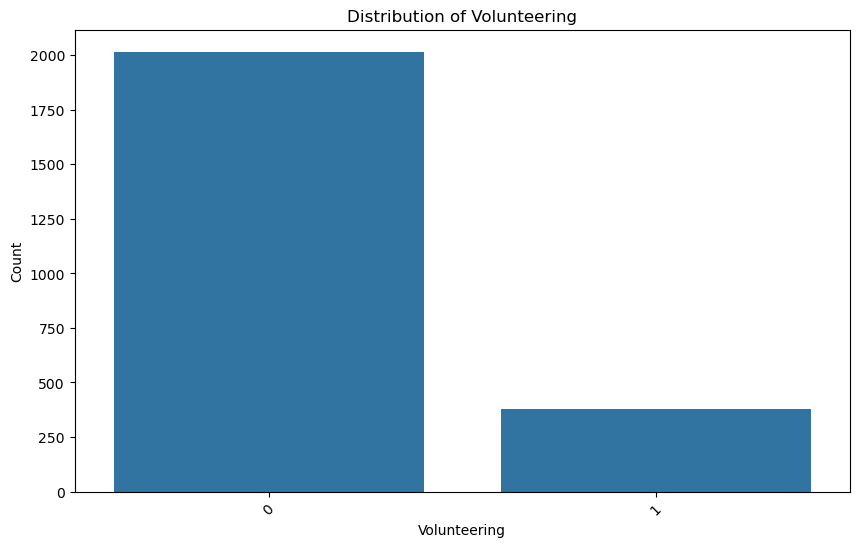

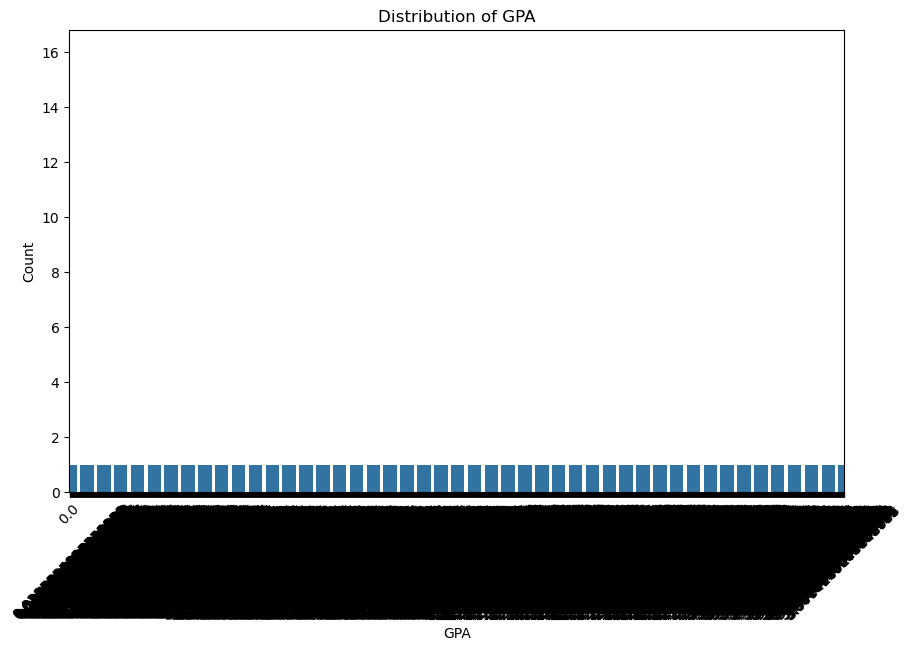

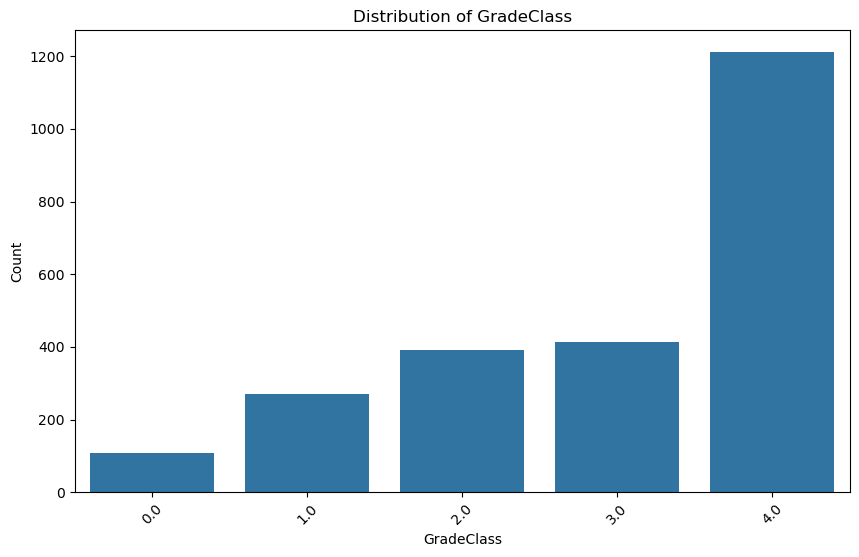

In [10]:
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

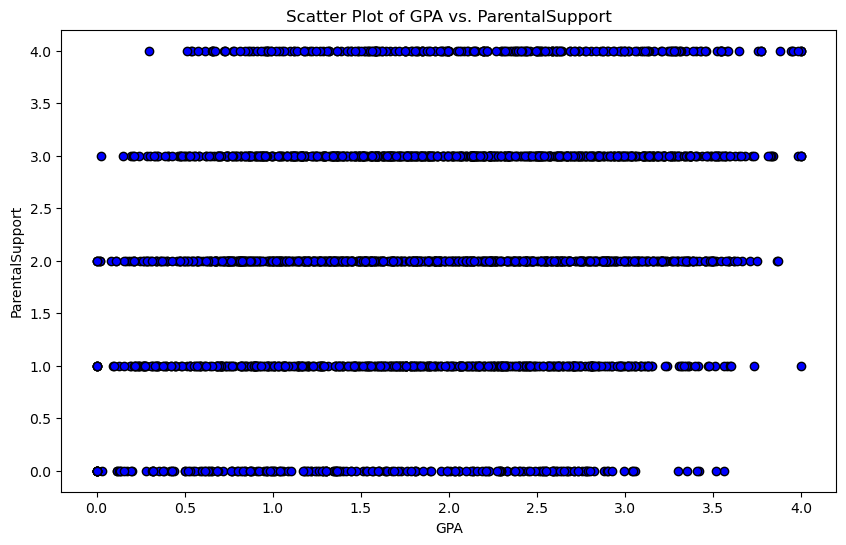

In [11]:
# 2. Phân Tích Dữ Liệu - Biểu Đồ Scatter Phân Bố Dữ Liệu Target
plt.figure(figsize=(10, 6))
plt.scatter(df['GPA'], df['ParentalSupport'], color='blue', edgecolor='black')
plt.title('Scatter Plot of GPA vs. ParentalSupport')
plt.xlabel('GPA')
plt.ylabel('ParentalSupport')
plt.show()

In [12]:
# 3. Chia Tập Huấn Luyện và Test, Sử Dụng Cross-Validation
X = df.drop(columns=['StudentID', 'GradeClass'])
y = df['GradeClass']

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Tạo mô hình
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {scores}')
print(f'Mean accuracy: {scores.mean()}')

Cross-validation accuracy scores: [0.90746269 0.93134328 0.93731343 0.90447761 0.91916168]
Mean accuracy: 0.9199517383144158


In [17]:
# 4. Huấn Luyện Mô Hình và Đánh Giá
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9164345403899722
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.52      0.65        33
         1.0       0.86      0.85      0.86        80
         2.0       0.91      0.89      0.90       121
         3.0       0.90      0.89      0.89       127
         4.0       0.94      0.99      0.96       357

    accuracy                           0.92       718
   macro avg       0.90      0.83      0.85       718
weighted avg       0.92      0.92      0.91       718



In [21]:
correlation_matrix = df.corr()

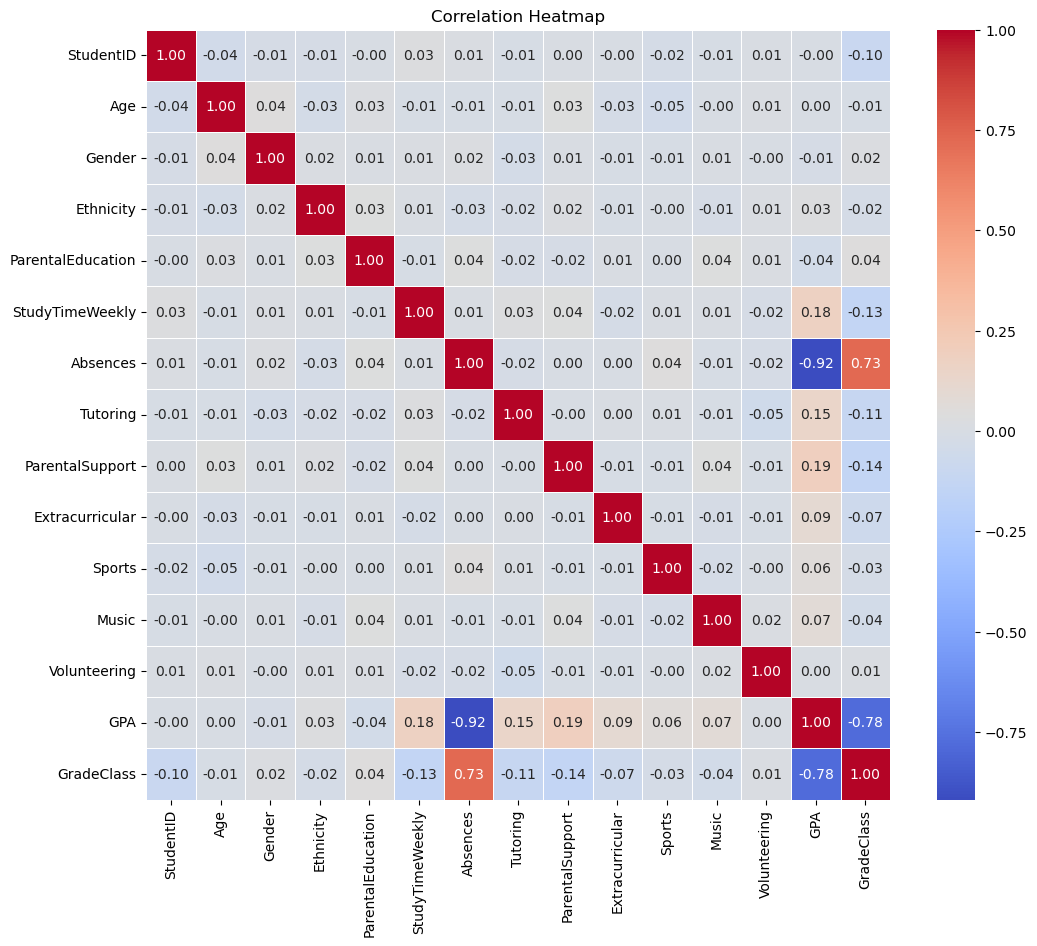

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
# Tính toán ma trận hiệp phương sai
cov_matrix = df.cov()

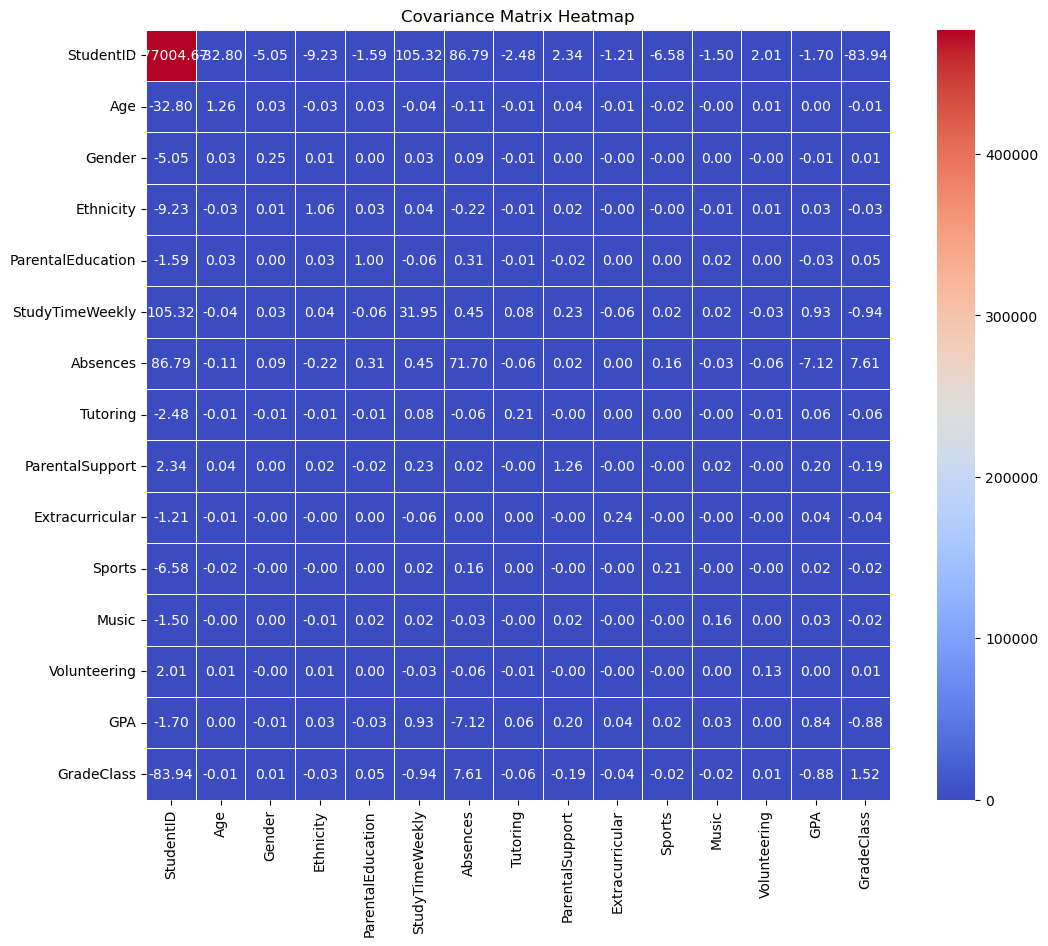

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()